<a href="https://colab.research.google.com/github/maggiecrowner/labs_fork/blob/main/KNN_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN Lab - Maggie Crowner

In [1]:
! git clone https://github.com/DS3001/knn

Cloning into 'knn'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 68 (delta 24), reused 27 (delta 12), pack-reused 23 (from 1)
Receiving objects: 100% (68/68), 13.58 MiB | 11.45 MiB/s, done.
Resolving deltas: 100% (25/25), done.


###Question 0

**Part 1**

Regression is when we create a model to predict a numerical, continuous variable. Classification is when we create a model to predict a discrete, categorical variable or a binary variable.

**Part 2**

A confusion table shows the actual verses predicted values to show accuracy in another form. It allows you to see how many predicted values were accurate and how many were not, but also which predicted values those were and what they predicted that was incorrect. You can see the counts of each of these categories in a large table.

**Part 3**

SSE is the sum of squared errors, which is another measure that shows how accurate the model is. You obtain the SSE by taking the difference between the predicted and true values, squaring them, and taking the sum of all of those differences.

**Part 4**

Overfitting is when you add so many parameters to a model to make it accurate on the training set that it no longer provides accurate prediction onto a test set because it is not at all generalizable. So, if there were outliers in the training set, it would be way off for the general data you would find outside of that set. Underfitting is when a model is so simplistic that it does not account for possible nuances in the trend that are actually significant for the data, so it also wouldn't perform well on the training set or the test set.

**Part 5**

Splitting the data into a training set and a test set allows you to test a model against more data that is readily available that is not the data you used to fit the model. This can ensure that no overfitting or underfitting occured, and that the model would theoretically also work well on any other data in the real world.

**Part 6**

Class label predictions are much easier to interpret as it gives you an "answer", but they do not provide any information about the certainty of the prediction. Predictions may not be as black and white as that, so a probability distribution of class labels may represent that better. However, the probability distribution of class labels will give you a lot more things to consider when you are looking at your answer.

#Question 1

**Part 1**

In [16]:
import pandas as pd
df = pd.read_csv('/content/knn/data/USA_cars_datasets.csv')
df = df.loc[:,['price','year','mileage']]
display(df)
print(df.describe())
print(df.shape)

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654
...,...,...,...
2494,7800,2019,23609
2495,9200,2018,34553
2496,9200,2018,31594
2497,9200,2018,32557


              price         year       mileage
count   2499.000000  2499.000000  2.499000e+03
mean   18767.671469  2016.714286  5.229869e+04
std    12116.094936     3.442656  5.970552e+04
min        0.000000  1973.000000  0.000000e+00
25%    10200.000000  2016.000000  2.146650e+04
50%    16900.000000  2018.000000  3.536500e+04
75%    25555.500000  2019.000000  6.347250e+04
max    84900.000000  2020.000000  1.017936e+06
(2499, 3)


There are no NAs to handle.

**Part 2**

In [17]:
def maxmin(z):
  z = (z-min(z))/(max(z)-min(z))
  return(z)
df['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])

**Part 3**

In [21]:
from sklearn.model_selection import train_test_split
y = df['price']
X = df[['year', 'mileage']]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

**Part 4**

SSE:  63223286609.11111


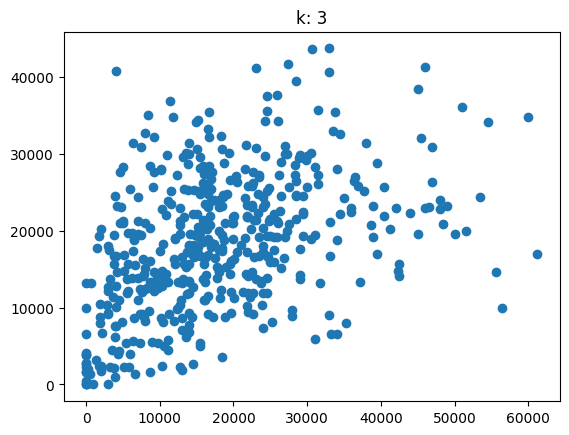

SSE:  55401092793.409996


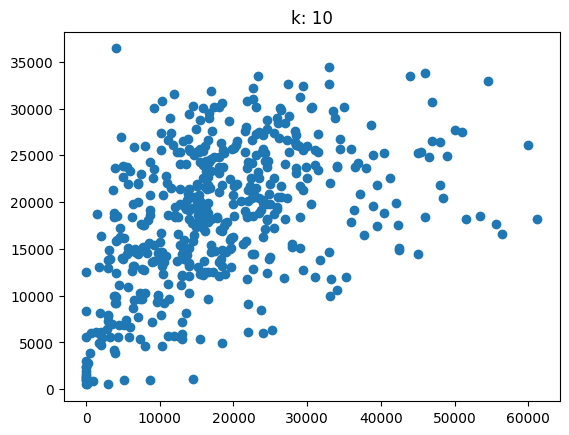

SSE:  51585228924.304


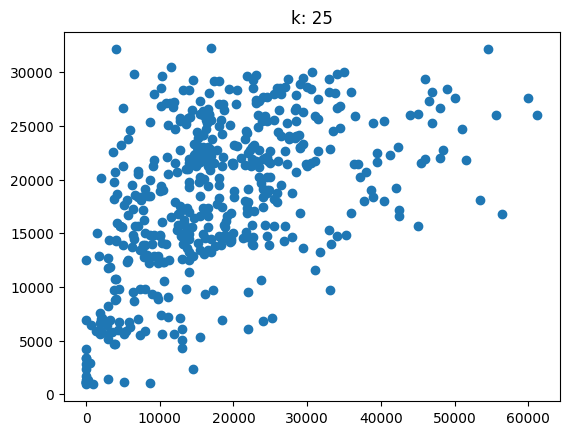

SSE:  49847721982.09799


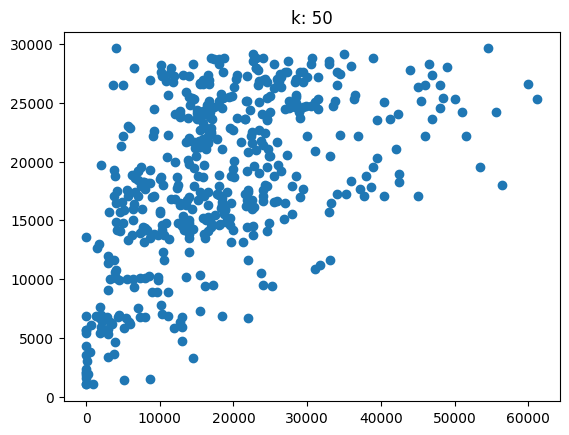

SSE:  49135529480.4603


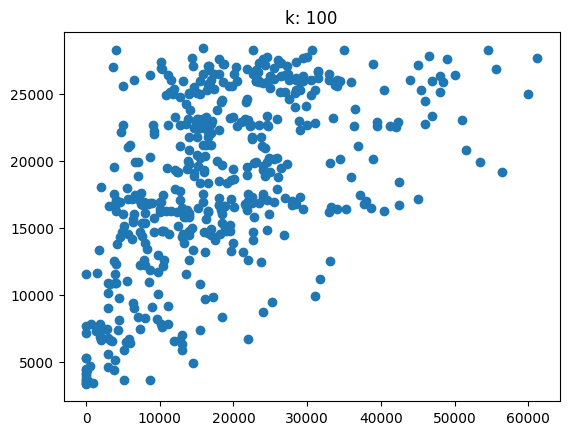

SSE:  50238649457.106


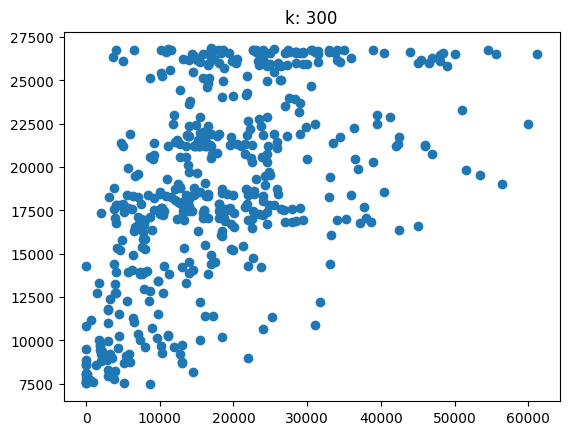

In [24]:
from sklearn.neighbors import KNeighborsRegressor as KNNreg
import matplotlib.pyplot as plt
import numpy as np

for k in [3,10,25,50,100,300]:
    model = KNNreg(n_neighbors=k)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    print('SSE: ', SSE)
    plot, axes = plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.title('k: '+str(k))
    plt.show()

The SSE decreases as you increase k, which makes sense since you're fitting the model based on many more observations. The variability in the graph also appears to decrease significantly since the y-axis limits decrease as k increases, which aligns with the decrease in the SSE.

**Part 5**

In [25]:
k_bar = 300
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
    model = KNNreg(n_neighbors=k+1)
    fitted_model = model.fit(X_train, y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum((y_test-y_hat)**2)

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

[77]


The optimal value of k is 77.

**Part 6**

For values of k below 77, the model was likely underfitting the data, which explains the lower accuracy and higher variability. For values of k above 77, the model was likely overfitting the data, which means it is not generalizable to the test set and would also have a lower accuracy. This also helps to explain why the variability increases a little bit again at k=300 on the plot. The k=300 plot shows a lot of similar predictions around 17500, 22000, and 27000, which is also evidence of overfitting.